In [1]:
## Script para leer perfiles de densidad lineal y graficar para articulos cientificos

In [1]:
# Importacion de librerias

import numpy as np
import pandas as pd

from scipy.optimize import least_squares
from scipy import optimize
from scipy.optimize import curve_fit

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import OrderedDict

import os
from math import *

**<font color=blue size=5>1. Heptanoico** 

In [2]:
#### PROCESO DE GRAFICACIÓN ####


###### Determinacion de la altura de la interfase

df_adf = pd.read_csv('adf_hb.profile', delimiter=" ", header = 3)

df_adf = df_adf.reset_index().T.reset_index(drop=True).T.iloc[:,1:74].T.reset_index(drop=True).T
df_adf=df_adf.drop(range(2, 74, 2),axis=1).T.reset_index(drop=True).T
df_O11_He_Oeao = df_adf.iloc[:,0:5].T.reset_index(drop=True).T
df_O11_He_Oeat = df_adf.iloc[:,[0,5,6,7,8]].T.reset_index(drop=True).T
df_O11_He_Oest = df_adf.iloc[:,[0,9,10,11,12]].T.reset_index(drop=True).T
df_Oeao_H11_O11 = df_adf.iloc[:,[0,13,14,15,16]].T.reset_index(drop=True).T
df_Oeat_H11_O11 = df_adf.iloc[:,[0,17,18,19,20]].T.reset_index(drop=True).T
df_Oest_H11_O11 = df_adf.iloc[:,[0,21,22,23,24]].T.reset_index(drop=True).T
df_O21_He_Oeao = df_adf.iloc[:,[0,25,26,27,28]].T.reset_index(drop=True).T
df_O21_He_Oeat = df_adf.iloc[:,[0,29,30,31,32]].T.reset_index(drop=True).T
df_O21_He_Oest = df_adf.iloc[:,[0,33,34,35,36]].T.reset_index(drop=True).T


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


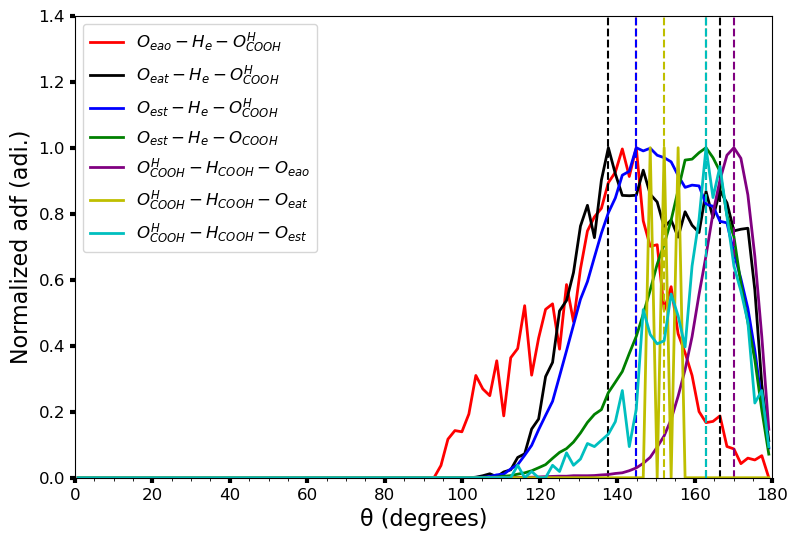

In [3]:
fig, ax = plt.subplots(figsize=(9,6))
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
plt.rcParams["font.family"] = 'Times New Roman'

x_max_O11_He_Oeao_2 = df_O11_He_Oeao.iloc[df_O11_He_Oeao.iloc[:,2].idxmax(),0]

ax.plot(df_O11_He_Oeao.iloc[:,0], df_O11_He_Oeao.iloc[:,2]/max(df_O11_He_Oeao.iloc[:,2]), 'r', label='$O_{eao}-H_e-O^{H}_{COOH}$', markersize=5, lw=2)
plt.axvline(x_max_O11_He_Oeao_2, color = 'r', linestyle='--')

x_max_O11_He_Oeat_2 = df_O11_He_Oeat.iloc[df_O11_He_Oeat.iloc[:,2].idxmax(),0]
x_max_O11_He_Oeat_2_2 = df_O11_He_Oeat.iloc[df_O11_He_Oeat.iloc[90:100,2].idxmax(),0]

ax.plot(df_O11_He_Oeat.iloc[:,0], df_O11_He_Oeat.iloc[:,2]/max(df_O11_He_Oeat.iloc[:,2]), 'k', label='$O_{eat}-H_e-O^{H}_{COOH}$', markersize=5, lw=2)
plt.axvline(x_max_O11_He_Oeat_2, color = 'k', linestyle='--')
plt.axvline(x_max_O11_He_Oeat_2_2, color = 'k', linestyle='--')

x_max_O11_He_Oest_2 = df_O11_He_Oest.iloc[df_O11_He_Oest.iloc[:,2].idxmax(),0]

ax.plot(df_O11_He_Oest.iloc[:,0], df_O11_He_Oest.iloc[:,2]/max(df_O11_He_Oest.iloc[:,2]), 'b', label='$O_{est}-H_e-O^{H}_{COOH}$', markersize=5, lw=2)
plt.axvline(x_max_O11_He_Oest_2, color = 'b', linestyle='--')

x_max_O21_He_Oest_2 = df_O21_He_Oest.iloc[df_O21_He_Oest.iloc[:,2].idxmax(),0]

ax.plot(df_O21_He_Oest.iloc[:,0], df_O21_He_Oest.iloc[:,2]/max(df_O21_He_Oest.iloc[:,2]), 'g', label='$O_{est}-H_e-O_{COOH}$', markersize=5, lw=2)
plt.axvline(x_max_O21_He_Oest_2, color = 'g', linestyle='--')

x_max_Oeao_H11_O11_2 = df_Oeao_H11_O11.iloc[df_Oeao_H11_O11.iloc[:,2].idxmax(),0]

ax.plot(df_Oeao_H11_O11.iloc[:,0], df_Oeao_H11_O11.iloc[:,2]/max(df_Oeao_H11_O11.iloc[:,2]), color='purple', label='$O^{H}_{COOH}-H_{COOH}-O_{eao}$', markersize=5, lw=2)
plt.axvline(x_max_Oeao_H11_O11_2, color = 'purple', linestyle='--')

x_max_Oeat_H11_O11_2 = df_Oeat_H11_O11.iloc[df_Oeat_H11_O11.iloc[81:83,2].idxmax(),0]
x_max_Oeat_H11_O11_2_2 = df_Oeat_H11_O11.iloc[df_Oeat_H11_O11.iloc[83:85,2].idxmax(),0]
x_max_Oeat_H11_O11_2_3 = df_Oeat_H11_O11.iloc[df_Oeat_H11_O11.iloc[85:100,2].idxmax(),0]

ax.plot(df_Oeat_H11_O11.iloc[:,0], df_Oeat_H11_O11.iloc[:,2]/max(df_Oeat_H11_O11.iloc[:,2]), 'y', label='$O^{H}_{COOH}-H_{COOH}-O_{eat}$', markersize=5, lw=2)
#plt.axvline(x_max_Oeat_H11_O11_2, color = 'y', linestyle='--')
plt.axvline(x_max_Oeat_H11_O11_2_2, color = 'y', linestyle='--')
#plt.axvline(x_max_Oeat_H11_O11_2_3, color = 'y', linestyle='--')

x_max_Oest_H11_O11_2 = df_Oest_H11_O11.iloc[df_Oest_H11_O11.iloc[:,2].idxmax(),0]

ax.plot(df_Oest_H11_O11.iloc[:,0], df_Oest_H11_O11.iloc[:,2]/max(df_Oest_H11_O11.iloc[:,2]), 'c', label='$O^{H}_{COOH}-H_{COOH}-O_{est}$', markersize=5, lw=2)
plt.axvline(x_max_Oest_H11_O11_2, color = 'c', linestyle='--')



ax.legend(loc='best', fontsize=12)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(20000))
ax.tick_params(axis='both', labelsize=12, width=3)
#ax.yaxis.set_mino
#r_locator(AutoMinorLocator())
ax.set_xlim(0, 180)
ax.set_ylim(0, 1.4)
ax.set_xlabel('θ (degrees)',  fontsize=16)
ax.set_ylabel('Normalized adf (adi.)', fontsize=16)
fig.savefig("Moderados.png", dpi=800)
plt.show()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


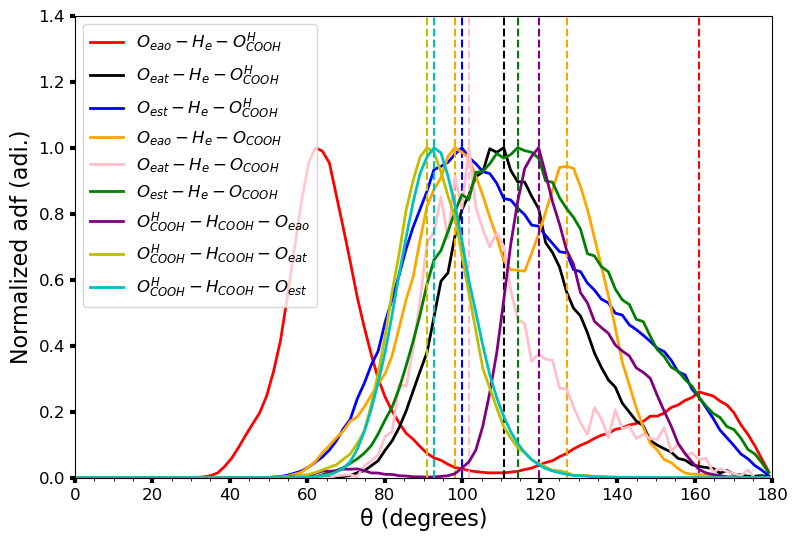

In [4]:
fig, ax = plt.subplots(figsize=(9,6))
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
plt.rcParams["font.family"] = 'Times New Roman'

x_max_O11_He_Oeao_3_1 = df_O11_He_Oeao.iloc[df_O11_He_Oeao.iloc[0:50,3].idxmax(),0]
x_max_O11_He_Oeao_3_2 = df_O11_He_Oeao.iloc[df_O11_He_Oeao.iloc[50:100,3].idxmax(),0]

ax.plot(df_O11_He_Oeao.iloc[:,0], df_O11_He_Oeao.iloc[:,3]/max(df_O11_He_Oeao.iloc[:,3]), 'r', label='$O_{eao}-H_e-O^{H}_{COOH}$', markersize=5, lw=2)
plt.axvline(x_max_O11_He_Oeao_3_2, color = 'r', linestyle='--')

x_max_O11_He_Oeat_3 = df_O11_He_Oeat.iloc[df_O11_He_Oeat.iloc[:,3].idxmax(),0]

ax.plot(df_O11_He_Oeat.iloc[:,0], df_O11_He_Oeat.iloc[:,3]/max(df_O11_He_Oeat.iloc[:,3]), 'k', label='$O_{eat}-H_e-O^{H}_{COOH}$', markersize=5, lw=2)
plt.axvline(x_max_O11_He_Oeat_3, color = 'k', linestyle='--')

x_max_O11_He_Oest_3 = df_O11_He_Oest.iloc[df_O11_He_Oest.iloc[:,3].idxmax(),0]

ax.plot(df_O11_He_Oest.iloc[:,0], df_O11_He_Oest.iloc[:,3]/max(df_O11_He_Oest.iloc[:,3]), 'b', label='$O_{est}-H_e-O^{H}_{COOH}$', markersize=5, lw=2)
plt.axvline(x_max_O11_He_Oest_3, color = 'b', linestyle='--')

x_max_O21_He_Oeao_3 = df_O21_He_Oeao.iloc[df_O21_He_Oeao.iloc[:60,3].idxmax(),0]
x_max_O21_He_Oeao_3_2 = df_O21_He_Oeao.iloc[df_O21_He_Oeao.iloc[60:,3].idxmax(),0]

ax.plot(df_O21_He_Oeao.iloc[:,0], df_O21_He_Oeao.iloc[:,3]/max(df_O21_He_Oeao.iloc[:,3]), color='orange', label='$O_{eao}-H_e-O_{COOH}$', markersize=5, lw=2)
plt.axvline(x_max_O21_He_Oeao_3, color = 'orange', linestyle='--')
plt.axvline(x_max_O21_He_Oeao_3_2, color = 'orange', linestyle='--')

x_max_O21_He_Oeat_3 = df_O21_He_Oeat.iloc[df_O21_He_Oeat.iloc[:,3].idxmax(),0]

ax.plot(df_O21_He_Oeat.iloc[:,0], df_O21_He_Oeat.iloc[:,3]/max(df_O21_He_Oeat.iloc[:,3]), color='pink', label='$O_{eat}-H_e-O_{COOH}$', markersize=5, lw=2)
plt.axvline(x_max_O21_He_Oeat_3, color = 'pink', linestyle='--')

x_max_O21_He_Oest_3 = df_O21_He_Oest.iloc[df_O21_He_Oest.iloc[:,3].idxmax(),0]

ax.plot(df_O21_He_Oest.iloc[:,0], df_O21_He_Oest.iloc[:,3]/max(df_O21_He_Oest.iloc[:,3]), 'g', label='$O_{est}-H_e-O_{COOH}$', markersize=5, lw=2)
plt.axvline(x_max_O21_He_Oest_3, color = 'g', linestyle='--')

x_max_Oeao_H11_O11_3 = df_Oeao_H11_O11.iloc[df_Oeao_H11_O11.iloc[:,3].idxmax(),0]

ax.plot(df_Oeao_H11_O11.iloc[:,0], df_Oeao_H11_O11.iloc[:,3]/max(df_Oeao_H11_O11.iloc[:,3]), color='purple', label='$O^{H}_{COOH}-H_{COOH}-O_{eao}$', markersize=5, lw=2)
plt.axvline(x_max_Oeao_H11_O11_3, color = 'purple', linestyle='--')

x_max_Oeat_H11_O11_3 = df_Oeat_H11_O11.iloc[df_Oeat_H11_O11.iloc[:,3].idxmax(),0]

ax.plot(df_Oeat_H11_O11.iloc[:,0], df_Oeat_H11_O11.iloc[:,3]/max(df_Oeat_H11_O11.iloc[:,3]), 'y', label='$O^{H}_{COOH}-H_{COOH}-O_{eat}$', markersize=5, lw=2)
plt.axvline(x_max_Oeat_H11_O11_3, color = 'y', linestyle='--')

x_max_Oest_H11_O11_3 = df_Oest_H11_O11.iloc[df_Oest_H11_O11.iloc[:,3].idxmax(),0]

ax.plot(df_Oest_H11_O11.iloc[:,0], df_Oest_H11_O11.iloc[:,3]/max(df_Oest_H11_O11.iloc[:,3]), 'c', label='$O^{H}_{COOH}-H_{COOH}-O_{est}$', markersize=5, lw=2)
plt.axvline(x_max_Oest_H11_O11_3, color = 'c', linestyle='--')

ax.legend(loc='best', fontsize=12)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(20000))
ax.tick_params(axis='both', labelsize=12, width=3)
#ax.yaxis.set_mino
#r_locator(AutoMinorLocator())
ax.set_xlim(0, 180)
ax.set_ylim(0, 1.4)
ax.set_xlabel('θ (degrees)',  fontsize=16)
ax.set_ylabel('Normalized adf (adi.)', fontsize=16)
fig.savefig("Debiles.png", dpi=800)
plt.show()